In [3]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import colors, cm, pyplot as plt
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from os.path import expanduser

In [5]:
summary_df = pd.read_pickle('{}/voxel_summary.pkl'.format(expanduser('~')))

In [6]:
summary_df.columns

Index(['bin_key', 'voxel_intensity', 'point_count', 'voxel_id'], dtype='object')

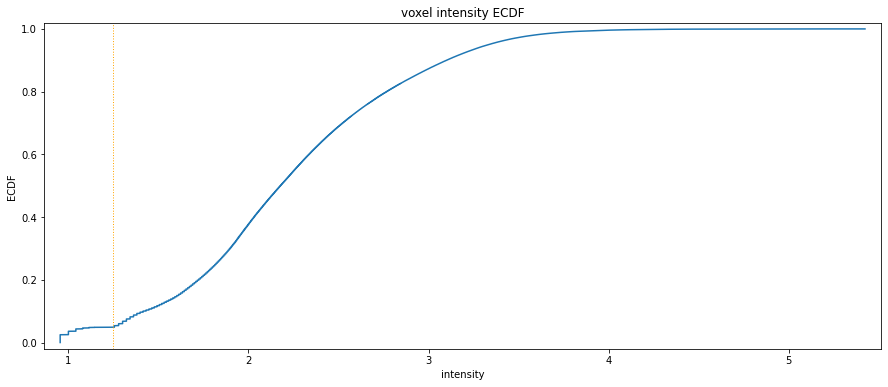

In [13]:
# determine the best clipping value using an ECDF

import statsmodels.api as sm
ecdf = sm.distributions.ECDF(np.log10(summary_df.voxel_intensity))

f, ax1 = plt.subplots()
plt.plot(ecdf.x, ecdf.y)
f.set_figheight(6)
f.set_figwidth(15)
plt.xlabel('intensity')
plt.ylabel('ECDF')
plt.axvline(x=1.25, linestyle=':', linewidth=1, color='orange')
plt.margins(0.02)
plt.title("voxel intensity ECDF")
plt.show()

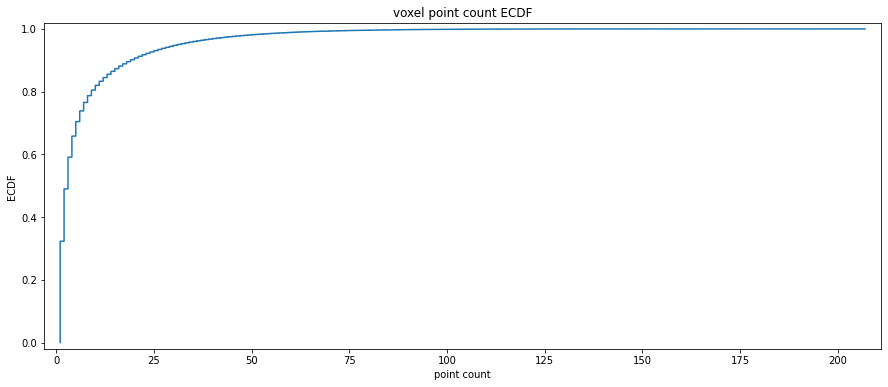

In [15]:
# determine the best clipping value using an ECDF

import statsmodels.api as sm
ecdf = sm.distributions.ECDF(summary_df.point_count)

f, ax1 = plt.subplots()
plt.plot(ecdf.x, ecdf.y)
f.set_figheight(6)
f.set_figwidth(15)
plt.xlabel('point count')
plt.ylabel('ECDF')
# plt.axvline(x=1.25, linestyle=':', linewidth=1, color='orange')
plt.margins(0.02)
plt.title("voxel point count ECDF")
plt.show()

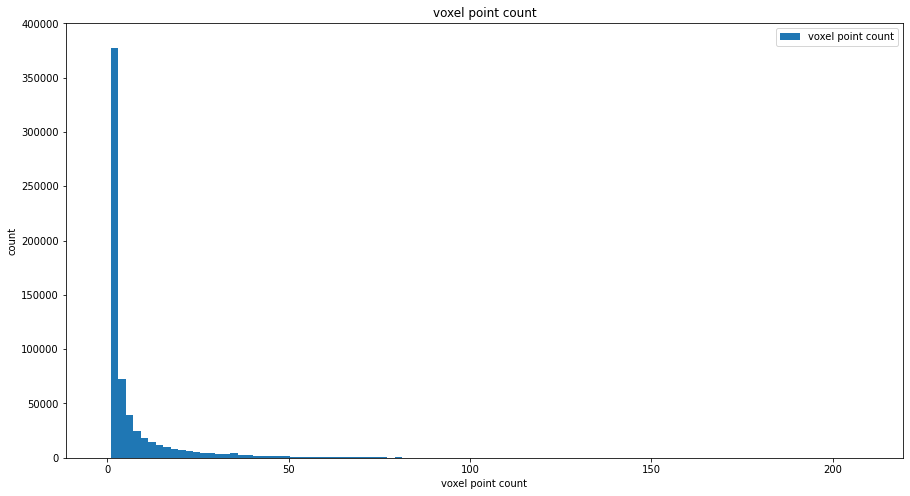

In [16]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('voxel point count')

bins = 100
hist, bins, _ = plt.hist(summary_df.point_count, bins=bins, label='voxel point count')

plt.xlabel('voxel point count')
plt.ylabel('count')

# plt.xlim((-20,20))
# plt.ylim((0,300))

plt.legend()
plt.show()

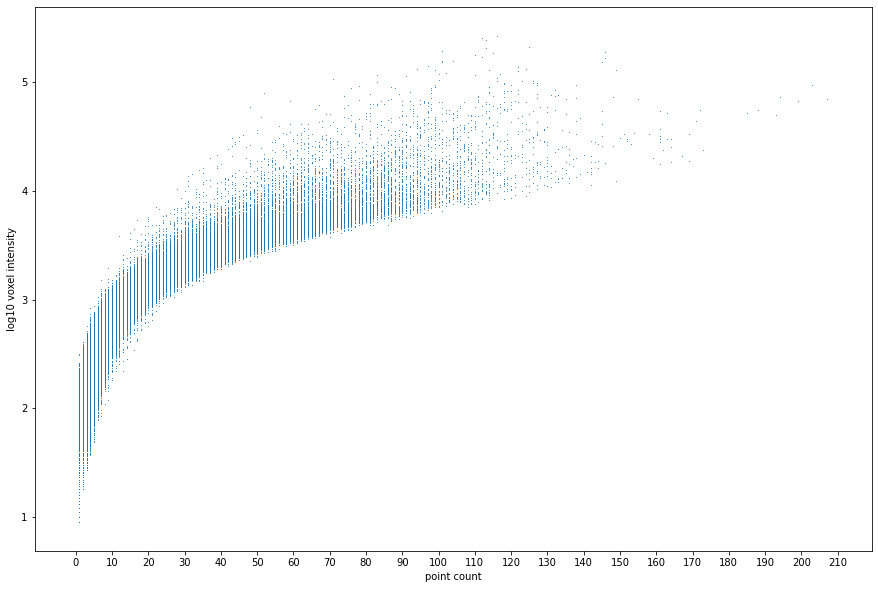

In [22]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

ax.scatter(summary_df.point_count, np.log10(summary_df.voxel_intensity), marker='o', lw=0, s=1, alpha=1.0)

plt.xlabel('point count')
plt.ylabel('log10 voxel intensity')
# plt.ylim((0,910))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

nearest = 10.0
range_l = round(summary_df.point_count.min() / nearest) * nearest
range_u = round(summary_df.point_count.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

plt.show()